## Computer Vision

**_Author:_**

**Date : 02 June,2022**

### Basics of Image Processing

**Loading Libraries**

In [1]:
import os
import pandas as pd
import numpy as np
import cv2

import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
# Skimage
from skimage.io import imread, imshow
from skimage.transform import resize
from skimage.feature import hog
from skimage import exposure

In [3]:
# Multiple print statments in a single cell
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

# Adjust the Display options for number of rows and columns 
pd.set_option("display.max_columns", 500)
pd.set_option("display.min_rows", 500)

**Check the current working directory**

In [4]:
print(f'Current working dircetory is : {os.getcwd()}')

Current working dircetory is : /Users/g0p00cc/Desktop/Superprof/Rishabh/Computer Vision/Python Codes


**Set-up the Folder Structure**

In [5]:
# Set the current folder location as where the data resides

folder_path = os.getcwd()

print("Current Folder path is : ",folder_path)
print('\n')
print("Please change this path accordingly!")

Current Folder path is :  /Users/g0p00cc/Desktop/Superprof/Rishabh/Computer Vision/Python Codes


Please change this path accordingly!


### Working with OpenCV

In [6]:
# Read the image
raw_img_1 = cv2.imread(os.path.join(folder_path, 'building_1.jpeg'))
raw_img_2 = cv2.imread(os.path.join(folder_path, 'building_2.jpeg'))

**Convert the images into RGB (compataible for CV2)**

In [7]:
img_1 = cv2.cvtColor(raw_img_1, cv2.COLOR_BGR2RGB)
img_2 = cv2.cvtColor(raw_img_2, cv2.COLOR_BGR2RGB)

**Plot the images**

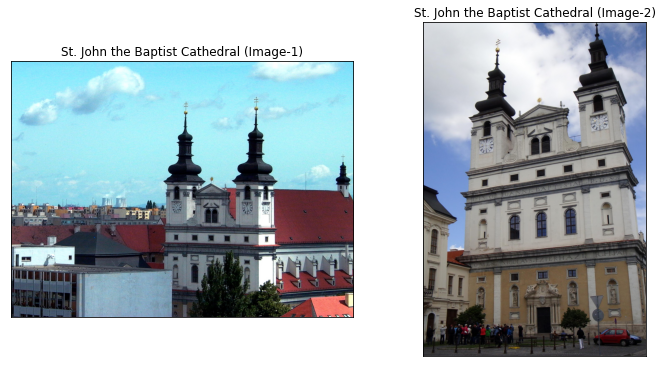

In [8]:
plt.figure(figsize=(10,10))

plt.subplot(221),
plt.imshow(img_1)
plt.title('St. John the Baptist Cathedral (Image-1)'), 
plt.xticks([]), plt.yticks([])

plt.subplot(222),
plt.imshow(img_2)
plt.title('St. John the Baptist Cathedral (Image-2)'), 
plt.xticks([]), plt.yticks([])

plt.tight_layout()
plt.show();

### HOG Featrues on Images

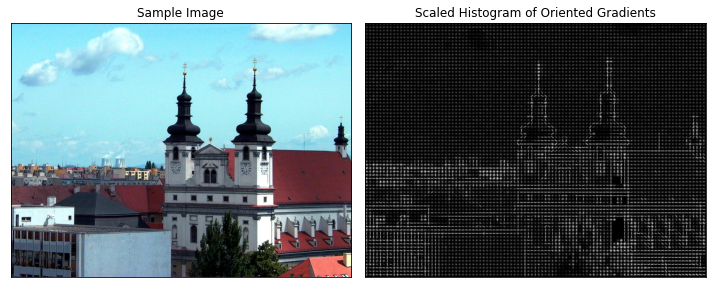

In [9]:
fd, hog_image = hog(img_1, orientations=8, pixels_per_cell=(16, 16),cells_per_block=(1, 1), visualize=True)

# Rescale histogram for better display
hog_image_rescaled = exposure.rescale_intensity(hog_image, in_range=(0, 10))


plt.figure(figsize=(10,10))
plt.subplot(121),
plt.imshow(img_1)
plt.title(f'Sample Image'), 
plt.xticks([]), plt.yticks([])

plt.subplot(122),
plt.imshow(hog_image_rescaled,cmap=plt.cm.gray)
plt.title(f'Scaled Histogram of Oriented Gradients'), 
plt.xticks([]), plt.yticks([])

plt.tight_layout()
plt.show();

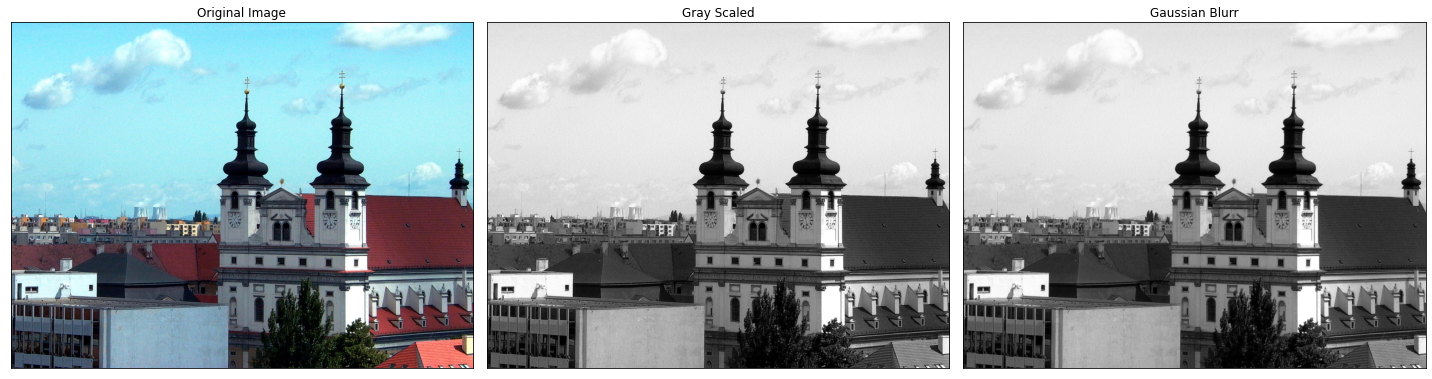

In [10]:
# converting to gray scale
gray = cv2.cvtColor(img_1, cv2.COLOR_BGR2GRAY)

# remove noise
img = cv2.GaussianBlur(gray,(3,3),0)


plt.figure(figsize=(20,10))
plt.subplot(131),
plt.imshow(img_1)
plt.title(f'Original Image'), 
plt.xticks([]), plt.yticks([])

plt.subplot(132),
plt.imshow(gray,cmap=plt.cm.gray)
plt.title('Gray Scaled'), 
plt.xticks([]), plt.yticks([])

plt.subplot(133),
plt.imshow(img,cmap=plt.cm.gray)
plt.title('Gaussian Blurr'), 
plt.xticks([]), plt.yticks([])

plt.tight_layout()
plt.show();

#### Edge using Laplacian

In [11]:
laplacian = cv2.Laplacian(img, cv2.CV_64F)
sobelx = cv2.Sobel(img,cv2.CV_64F,1,0,ksize=5)  # x
sobely = cv2.Sobel(img,cv2.CV_64F,0,1,ksize=5)  # y

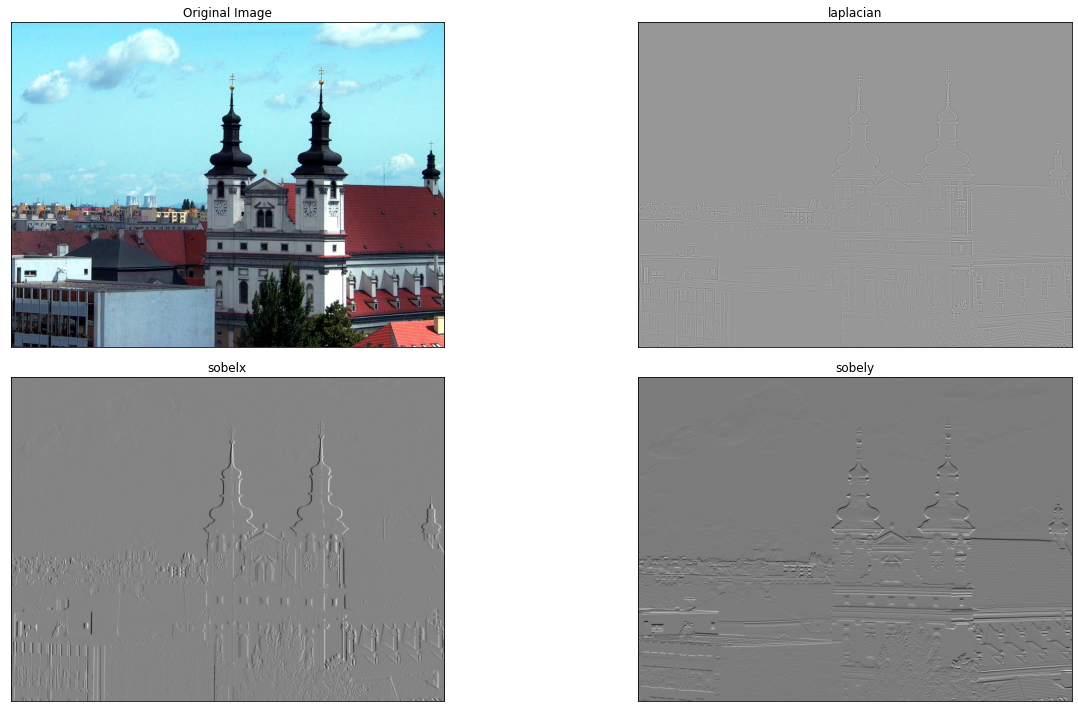

In [12]:
plt.figure(figsize=(20,10))

plt.subplot(221),
plt.imshow(img_1)
plt.title(f'Original Image'), 
plt.xticks([]), plt.yticks([])

plt.subplot(222),
plt.imshow(laplacian,cmap=plt.cm.gray)
plt.title('laplacian'), 
plt.xticks([]), plt.yticks([])

plt.subplot(223),
plt.imshow(sobelx,cmap=plt.cm.gray)
plt.title('sobelx'), 
plt.xticks([]), plt.yticks([])

plt.subplot(224),
plt.imshow(sobely,cmap=plt.cm.gray)
plt.title('sobely'), 
plt.xticks([]), plt.yticks([])

plt.tight_layout()
plt.show();

**Creating a mask**

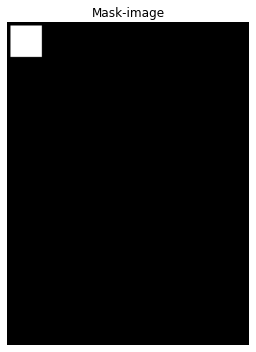

In [13]:
mask = np.zeros((4624,3468,3), dtype='float32')
mask[50:500,50:500,:] = (1,1,1)

# Plot the mask
plt.figure(figsize=(5,5))
plt.axis('off')
plt.title('Mask-image')
plt.imshow(mask)

plt.tight_layout()
plt.show();

### Color Quantization

In [14]:
raw_img_1 = cv2.imread(os.path.join(folder_path, 'building_1.jpeg'))

In [15]:
raw_img_1.shape

(1187, 1586, 3)

In [16]:
Z = raw_img_1.reshape((-1,3))

In [17]:
Z.shape

(1882582, 3)

In [18]:
1187*1586

1882582

In [19]:
# convert to np.float32
Z = np.float32(Z)

In [20]:
# define criteria, number of clusters(K) and apply kmeans()
criteria = (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, 10, 1.0)

In [21]:
criteria

(3, 10, 1.0)

In [22]:
K = 8
ret,label,center=cv2.kmeans(Z,K,None,criteria,10,cv2.KMEANS_RANDOM_CENTERS)

In [23]:
# Now convert back into uint8, and make original image
center = np.uint8(center)
res = center[label.flatten()]
res2 = res.reshape((raw_img_1.shape))

In [ ]:
# cv2.imshow('res2',res2)
# cv2.waitKey(0)
# cv2.destroyAllWindows()

### Sampling and Quantization

In [24]:
# Read the image
im_barbara = cv2.imread(os.path.join(folder_path, 'barbara.jpeg'))

# Convert the image into numpy array and normalize each pixel value by dividng them with 255
image = np.array(im_barbara, dtype = np.float64)/255

# Find the height width and channels in the image
h,w,d = image.shape

# Reshape the image
image_array = np.reshape(image,(h*w,d))

print(f'Original image || Type: {type(im_barbara)}')
print(f'Original image || Shape: {im_barbara.shape}')

print(f'Original image || Image height: {h}')
print(f'Original image || Image width: {w}')
print(f'Original image || Image depth: {d}')

Original image || Type: <class 'numpy.ndarray'>
Original image || Shape: (510, 510, 3)
Original image || Image height: 510
Original image || Image width: 510
Original image || Image depth: 3


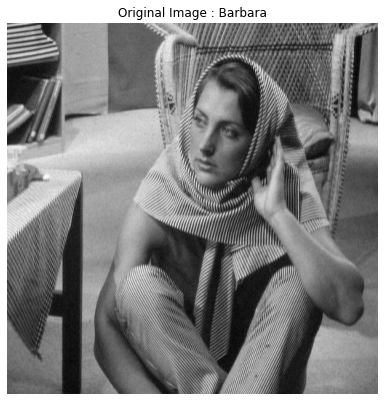

In [25]:
# show original image
fig = plt.figure(figsize=(20,15))
fig.add_subplot(221)
plt.axis('off')
plt.title('Original Image : Barbara')
plt.imshow(im_barbara)
plt.show();

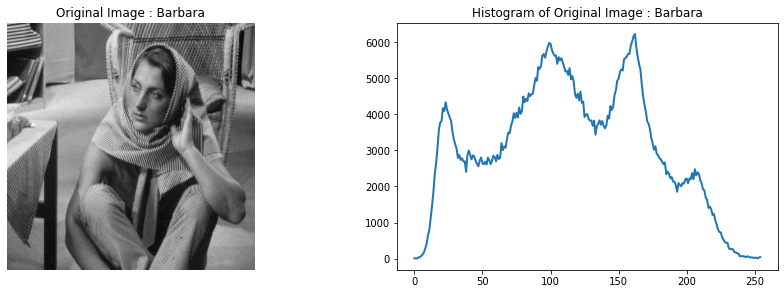

In [26]:
# show original image and it's histogram

fig = plt.figure(figsize=(15,10))

# show original image
fig.add_subplot(221)
plt.axis('off')
plt.title('Original Image : Barbara')
plt.imshow(im_barbara)

# Show the histogram
fig.add_subplot(222)
plt.title('Histogram of Original Image : Barbara')
hist = np.histogram(im_barbara, bins = np.arange(0,256))
plt.plot(hist[1][:-1],hist[0],lw = 2);

plt.show();

In [27]:
# Create blank images
new_image_1 = np.zeros((h, w, d), np.uint8)
new_image_2 = np.zeros((h, w, d), np.uint8)

In [31]:
# Quantization for K=2
for i in range(h):
    for j in range(w):
        for k in range(d):
            if im_barbara[i, j][k] < 128:
                val = 0
            else:
                val = 128
            new_image_1[i, j][k] = np.uint8(val)

In [32]:
# Quantization for K=4 
for i in range(h):
    for j in range(w):
        for k in range(d):
            if im_barbara[i, j][k] < 64:
                val = 0
            elif im_barbara[i, j][k] < 128:
                val = 64
            elif im_barbara[i, j][k] < 192:
                val = 128
            else:
                val = 192
            new_image_2[i, j][k] = np.uint8(val)

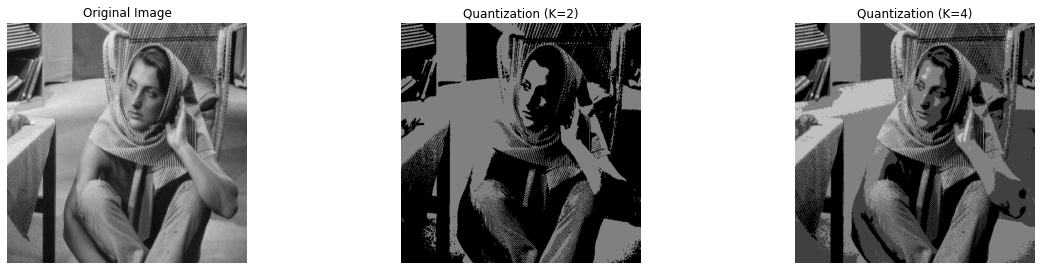

In [33]:
# show original image and it's quantized versions

fig = plt.figure(figsize=(20,15))

# show original image
fig.add_subplot(331)
plt.axis('off')
plt.title('Original Image')
plt.imshow(im_barbara)

fig.add_subplot(332)
plt.axis('off')
plt.title('Quantization (K=2)')
plt.imshow(new_image_1)

fig.add_subplot(333)
plt.axis('off')
plt.title('Quantization (K=4)')
plt.imshow(new_image_2)

plt.show();

**Use the K-means clustering algorithm to quantize the image into clusters such that the image has k colors.**


In [35]:
from skimage import io
from sklearn.cluster import KMeans
from sklearn.utils import shuffle

In [50]:
num_colors = 4 # Change the value of K here

# Let's train a K-Means quantizer based on a sample for n colours. This value of n will be provided by us.

image_array_sample = shuffle(image_array,random_state = 123)
K_Means = KMeans(n_clusters = num_colors).fit(image_array_sample)
labels = K_Means.predict(image_array)

In [51]:
# Now let's create the Quantized image
image_out = np.zeros((h,w,d))
label_index = 0

In [52]:
for i in range(h):
    for j in range(w):
        image_out[i][j] = K_Means.cluster_centers_[labels[label_index]]
        label_index += 1

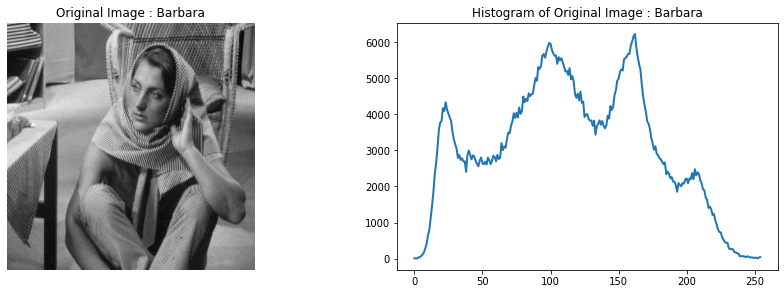

In [53]:
# show original image and it's histogram

fig = plt.figure(figsize=(15,10))

# Original Image and Histogram

fig.add_subplot(121)
plt.axis('off')
plt.title('Original Image : Barbara')
plt.imshow(image)

# Show the histogram
fig.add_subplot(122)
plt.title('Histogram of Original Image : Barbara')
hist = np.histogram(im_barbara, bins = np.arange(0,256))
plt.plot(hist[1][:-1],hist[0],lw = 2);

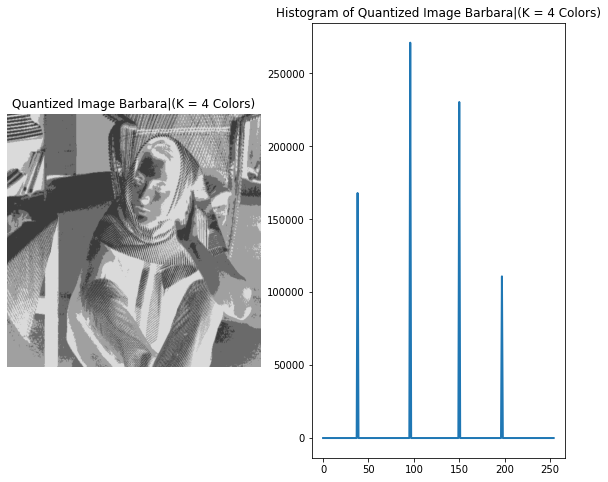

In [58]:
# Quantized Image and Histogram

fig = plt.figure(figsize=(10,8))

fig.add_subplot(121)
plt.axis('off')
plt.title('Quantized Image Barbara|(K = 4 Colors)')
plt.imshow(image_out)

# Convert the image output for plot
image_out = np.array(image_out * 255, dtype = np.uint8)
# Show the histogram
fig.add_subplot(122)
plt.title('Histogram of Quantized Image Barbara|(K = 4 Colors)')
hist = np.histogram(image_out, bins = np.arange(0,256))
plt.plot(hist[1][:-1],hist[0],lw = 2);

plt.show();